In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

A = [[ 1  1]
 [-2 -1]] 
 Eigval = [-0.+1.j -0.-1.j] 
 Eigvecs = 
[[-0.4082-0.4082j -0.4082+0.4082j]
 [ 0.8165+0.j      0.8165-0.j    ]]
[[ 0.6258 -0.6242]
 [-0.6242  1.2508]]


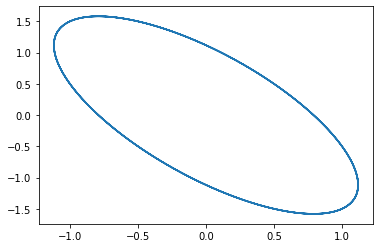

In [6]:
d = 2
tlen = 300
end = 8 * np.pi

t = np.linspace(0, end, num=tlen)
t0 = np.ones(d) * 0.5

"""
A = np.zeros((3,3))
for i in range(d):
    for j in range(i,d):
        r = (np.random.rand() - 0.5) / 8
        A[i,j] = r
        A[j,i] = r

A[0,0] = 1
A[0,1] = 1
A[0,2] = 1        
"""
# a=5
# A = np.array([[1,a],[-a,1]])

# A = np.array([[-0.34697826, -0.31593745, 0.02486731], [ 0.21653342, -0.41345191, 0.37377893],[ 0.10522816, -0.2791675,  -0.05924747]])
A = np.array([[1,1],[-2,-1]]) # Friendly Circular Matrix
# A = np.array([[1,1,1],[5,6,3],[0.5,0.1,-2.2]])
# A = np.random.rand(d,d) - 0.5
# theta = 1.0*np.pi / 3.0 # rotation matrix
# A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

np.set_printoptions(precision=4, suppress=True)
print("A = {a} \n Eigval = {va} \n Eigvecs = \n{ve}".format(a=A, va=la.eig(A)[0],ve=la.eig(A)[1]))

def linsys(xi, ti):
    return A @ xi #c + np.sin(ti)

# Continuous
sys = odeint(linsys, t0, t)
# print(sys)
"""# Discrete
sys = np.ones((tlen,d)) * 0.5
for i in range(tlen-1):
    sys[i+1] = A @ sys[i] + np.cos(i)
"""
    
print(np.cov(sys,rowvar=False))
    
figLin = plt.figure()
plt.plot(sys[:,0],sys[:,1])
#axLin = plt.axes(projection="3d")
#axLin.plot(sys[:,0],sys[:,1],sys[:,2])
plt.show()

In [7]:
print(la.eig(np.array([[0.5,0],[0.5,0]])))
print(la.eig(np.array([[1,1],[-2,-1]])))
print(la.eig(np.array([[1,-1],[-1,2]])))

(array([0. , 0.5]), array([[0.    , 0.7071],
       [1.    , 0.7071]]))
(array([-0.+1.j, -0.-1.j]), array([[-0.4082-0.4082j, -0.4082+0.4082j],
       [ 0.8165+0.j    ,  0.8165-0.j    ]]))
(array([0.382, 2.618]), array([[-0.8507,  0.5257],
       [-0.5257, -0.8507]]))
